<a href="https://colab.research.google.com/github/Quang-Nguyen-Van/MSE_Image-Video-Processing/blob/main/Quizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load data from google drive into the runtime.
!rmdir data
!mkdir data

!gdown --folder https://drive.google.com/drive/folders/1iXH61NqGF69w6sB5T9IyTBH4_4MLupTS?usp=sharing -O /content/data/

rmdir: failed to remove 'data': No such file or directory
Retrieving folder list
Processing file 1oFY5lj1c5J-2jIq1e8_ViWsMbcVZgmRM nature.jpg
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1oFY5lj1c5J-2jIq1e8_ViWsMbcVZgmRM
To: /content/data/Quizz/nature.jpg
100% 7.93k/7.93k [00:00<00:00, 12.1MB/s]
Download completed


In [2]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.util import random_noise

imgFile = '/content/data/Quizz/nature.jpg'

Text(0.5, 1.0, 'Blue layer')

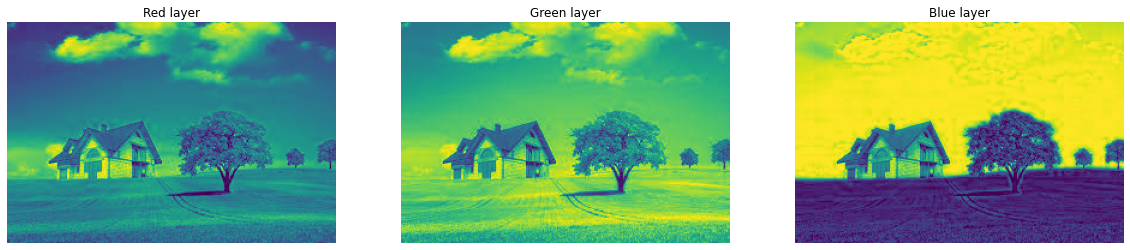

In [3]:
# Load image
Img = cv2.imread(imgFile)  # Load image
destRGB = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(destRGB)

# Cau 1

fig = plt.figure(figsize=(20, 20))  
fig.add_subplot(1, 3, 1)
plt.imshow(r)
plt.axis('off')
plt.title('Red layer')
 
fig.add_subplot(1, 3, 2)
plt.imshow(g)
plt.axis('off')
plt.title('Green layer')


fig.add_subplot(1, 3, 3)
plt.imshow(b)
plt.axis('off')
plt.title('Blue layer')


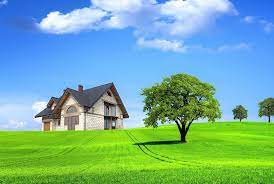

In [4]:
# Cau 2
destBGR = cv2.cvtColor(destRGB, cv2.COLOR_RGB2BGR)
cv2_imshow(destBGR)

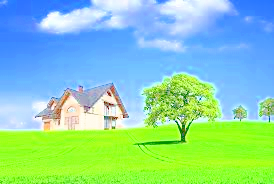

In [5]:
# Cau 3
hsv = cv2.cvtColor(destRGB, cv2.COLOR_RGB2HSV) #convert it to hsv
brt = 100
h, s, v = cv2.split(hsv)
v = np.where(v <= 255 - brt, v + brt, 255)
final_hsv = cv2.merge((h, s, v))

img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(img)

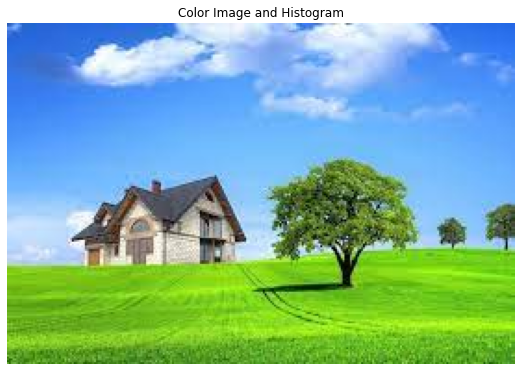

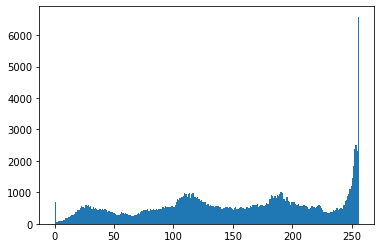

In [6]:
# Cau 4
# Histogram of Color Image

fig1 = plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(destRGB)
histg = cv2.calcHist([destRGB],[0],None,[256],[0,256])


plt.imshow(destRGB)
plt.axis('off')
plt.title('Color Image and Histogram')
plt.show()


plt.hist(destRGB.ravel(),256,[0,256])
plt.show()

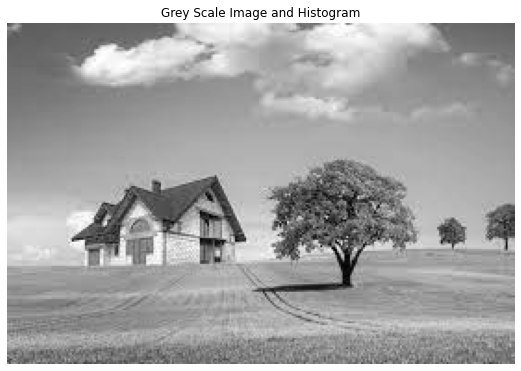

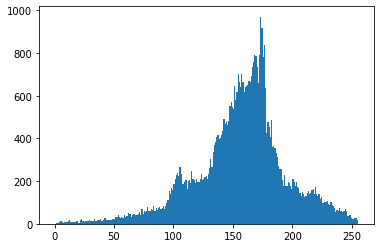

In [7]:
# Cau 4
# Histogram of Gray Scale Image
Img1 = cv2.imread(imgFile)
greyImg = cv2.cvtColor(Img1, cv2.COLOR_BGR2GRAY)
fig1 = plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(greyImg)
greyHistg = cv2.calcHist([greyImg],[0],None,[256],[0,256])


plt.imshow(greyImg, cmap='gray')
plt.axis('off')
plt.title('Grey Scale Image and Histogram')
plt.show()


plt.hist(greyImg.ravel(),256,[0,256])
plt.show()


Text(0.5, 1.0, 'Flipped image from left to right')

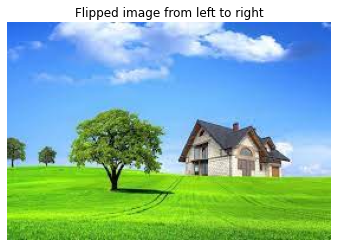

In [28]:
# Cau 5
# Flipp image from left to right
flippedImage = cv2.flip(Img1, 1)
flippedImage = cv2.cvtColor(flippedImage, cv2.COLOR_BGR2RGB)
plt.imshow(flippedImage, cmap='gray')
plt.axis('off')
plt.title('Flipped image from left to right')

Text(0.5, 1.0, 'Image Rotated 180 degrees')

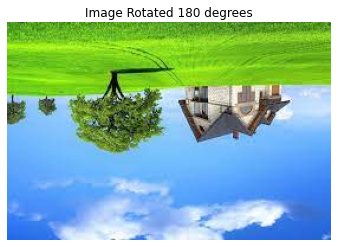

In [29]:
# Cau 5
# Rotate image clockwise 180 degrees
imgRotate180 = cv2.rotate(Img1, cv2.ROTATE_180)
imgRotate180 = cv2.cvtColor(imgRotate180, cv2.COLOR_BGR2RGB)
plt.imshow(imgRotate180)
plt.axis('off')
plt.title('Image Rotated 180 degrees')

Text(0.5, 1.0, 'Cropped Image')

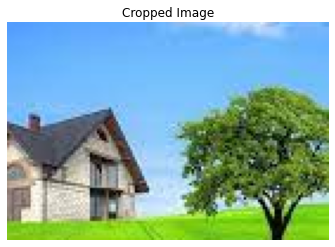

In [30]:
# Cau 5
# crop ½ central of the image

widt, heigt = Img1.shape[1], Img1.shape[0]
mid_x, mid_y = int(widt/2), int(heigt/2)
cw2, ch2 = int(mid_x/2), int(mid_y/2)
croppedImg = Img1[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x + cw2]
croppedImg = cv2.cvtColor(croppedImg, cv2.COLOR_BGR2RGB)

plt.imshow(croppedImg)
plt.axis('off')
plt.title('Cropped Image')

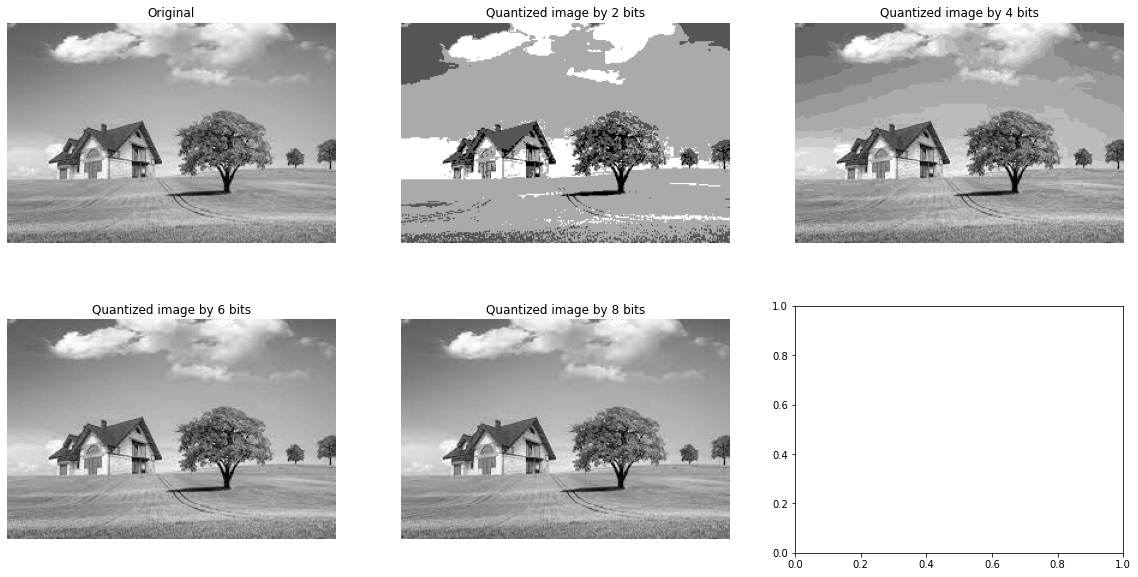

In [24]:
# Cau 5
# Load the grayscale image
img = cv2.imread(imgFile, cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

arr_bits = [2, 4 ,6 , 8]
row = 0
col = 1
for i in range(0, len(arr_bits)):
  bits = arr_bits[i]
  quantization_interval = 2**8 // 2**bits

  # Quantize image
  quantized_img = np.floor_divide(img, quantization_interval) * quantization_interval

  if i == 2: 
    row = 1
    col = 0
  axs[row, col].imshow(quantized_img, cmap='gray')
  axs[row, col].set_title('Quantized image by ' + str(bits) + ' bits')
  axs[row, col].axis('off')
  col = col + 1

plt.show()

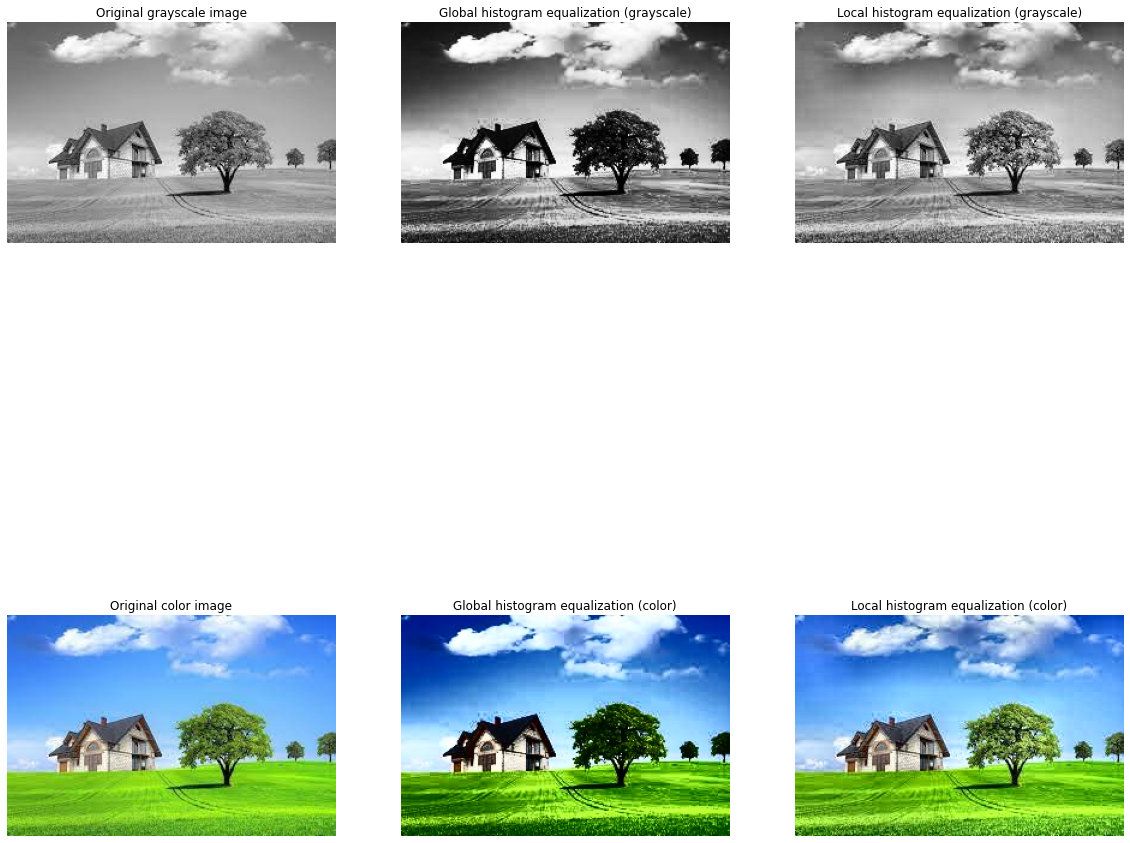

In [25]:
gray_img = cv2.imread(imgFile, cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread(imgFile)

# Global histogram equalization for grayscale image
global_hist_eq_gray = cv2.equalizeHist(gray_img)

# Global histogram equalization for color image
color_img_yuv = cv2.cvtColor(color_img, cv2.COLOR_BGR2YUV)
color_img_yuv[:,:,0] = cv2.equalizeHist(color_img_yuv[:,:,0])
global_hist_eq_color = cv2.cvtColor(color_img_yuv, cv2.COLOR_YUV2BGR)

# Local histogram equalization for grayscale image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
local_hist_eq_gray = clahe.apply(gray_img)

# Local histogram equalization for color image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
color_img_yuv = cv2.cvtColor(color_img, cv2.COLOR_BGR2YUV)
color_img_yuv[:,:,0] = clahe.apply(color_img_yuv[:,:,0])
local_hist_eq_color = cv2.cvtColor(color_img_yuv, cv2.COLOR_YUV2BGR)

# Display the original and equalized images
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))

axs[0, 0].imshow(gray_img, cmap='gray')
axs[0, 0].set_title('Original grayscale image')
axs[0, 0].axis('off')

axs[0, 1].imshow(global_hist_eq_gray, cmap='gray')
axs[0, 1].set_title('Global histogram equalization (grayscale)')
axs[0, 1].axis('off')

axs[0, 2].imshow(local_hist_eq_gray, cmap='gray')
axs[0, 2].set_title('Local histogram equalization (grayscale)')
axs[0, 2].axis('off')

axs[1, 0].imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Original color image')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(global_hist_eq_color, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Global histogram equalization (color)')
axs[1, 1].axis('off')

axs[1, 2].imshow(cv2.cvtColor(local_hist_eq_color, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title('Local histogram equalization (color)')
axs[1, 2].axis('off')

plt.show()